In [148]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [149]:
#installing the necessary packages
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

In [176]:
# pull the csv file from my device with the song data
df = pd.read_csv('/Users/ragave/Downloads/arianagrande_spotify.csv')
# remove duplicate danceability column from the original data
df = df.drop(columns=['danceability.1'])
# display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1


In [198]:
# creating a copy of the dataset
df_canalysis = df.copy()
df_canalysis = df_canalysis.iloc[:300]

In [200]:
# retreive the column names
df.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [199]:
# creating a dataframe without the categorical features
# do not include unnamed, name, album, artist, release_date, and length
X = df_canalysis.iloc[:, [6,7,8,9,10,11,12,13,14,15]].values

In [201]:
# display the copy of the dataset
print(X.shape)
df_canalysis.head()

(90, 10)


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1


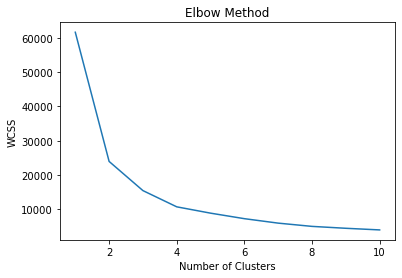

In [206]:
# finding out how many number of clusters are needed
wcss = []
# create the plot of the elbow method
# use the dataframe without the categorical variables
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [207]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
#scaling each feature to a given range
scaler = MinMaxScaler()

In [208]:
# scale the dataframe without the categorical variables
scaled = scaler.fit_transform(X)

In [209]:
# instantiating model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
preds_kmeans = kmeans.fit_predict(scaled)

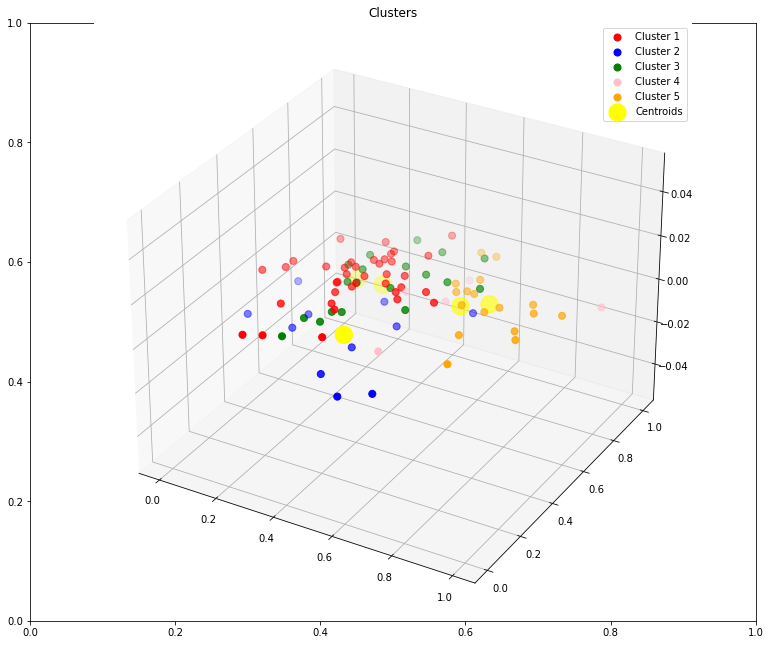

In [211]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
# display cluster 1
plt.scatter(scaled[preds_kmeans == 0,0],scaled[preds_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
# display cluster 2 
plt.scatter(scaled[preds_kmeans == 1,0], scaled[preds_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
# display cluster 3
plt.scatter(scaled[preds_kmeans == 2,0], scaled[preds_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
# display cluster 4
plt.scatter(scaled[preds_kmeans == 3,0], scaled[preds_kmeans == 3,1], s= 50, c= 'pink', label= 'Cluster 4')
# display cluster 5
plt.scatter(scaled[preds_kmeans == 4,0], scaled[preds_kmeans == 4,1], s= 50, c= 'orange', label= 'Cluster 5')
# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [212]:
# predictions of cluster arrangement
preds_kmeans

array([1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 4, 3, 2, 2, 2, 1, 3,
       4, 3, 4, 0, 1, 4, 3, 4, 4, 1, 0, 0, 2, 4, 2, 4, 4, 4, 4, 0, 2, 4,
       2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 4, 4,
       0, 4, 3, 0, 0, 4, 1, 0, 1, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int32)

In [213]:
# putting the predictions into a dataframe
kmeans = pd.DataFrame(data=preds_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# dataframe with predictions
print(kmeans.shape)
kmeans.head()

(90, 1)


,k_cluster
0,1
1,2
2,0
3,0
4,2


In [215]:
# concatenating the cluster column to the dataframe
df_canalysis = pd.concat([df_canalysis, kmeans], axis=1)

# print the concatenated dataframe
print(df_canalysis.shape)
df_canalysis.head()

(90, 17)


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.462,0.0,0.0946,-5.308,0.0312,127.698,4,1
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.0,0.2480,-6.476,0.0940,109.978,4,2
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.0,0.1660,-5.664,0.0652,116.965,4,0
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.0,0.1250,-5.156,0.1650,128.006,4,0
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.0,0.3980,-7.295,0.0981,88.332,1,2


In [223]:
# checking the number of songs in each cluster
df_canalysis['k_cluster'].value_counts()

0    38
2    19
4    17
1    11
3     5
Name: k_cluster, dtype: int64

In [225]:
# checking the songs in cluster 1
df_canalysis.loc[df_canalysis['k_cluster'] == 0]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4,0
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4,0
6,6,safety net (feat. Ty Dolla $ign),Positions (Deluxe),Ariana Grande,2021-02-19,208457,59,0.552,0.0703,0.599,0.000000,0.0986,-5.750,0.0404,161.884,4,0
8,8,nasty,Positions (Deluxe),Ariana Grande,2021-02-19,200732,59,0.772,0.0814,0.506,0.000011,0.1820,-6.558,0.1390,127.894,4,0
10,10,love language,Positions (Deluxe),Ariana Grande,2021-02-19,179860,57,0.688,0.0686,0.573,0.000000,0.0749,-5.030,0.2080,110.034,4,0
11,11,positions,Positions (Deluxe),Ariana Grande,2021-02-19,172324,60,0.737,0.4680,0.802,0.000000,0.0931,-4.771,0.0878,144.015,4,0
12,12,obvious,Positions (Deluxe),Ariana Grande,2021-02-19,146958,57,0.624,0.0967,0.672,0.000000,0.1550,-5.334,0.1060,159.852,4,0
25,25,make up,"thank u, next",Ariana Grande,2019-02-08,140693,67,0.671,0.0844,0.714,0.000001,0.0568,-5.373,0.2100,105.137,3,0
32,32,blazed (feat. Pharrell Williams),Sweetener,Ariana Grande,2018-08-17,196360,57,0.795,0.0793,0.759,0.000000,0.0805,-6.348,0.0528,110.021,4,0
33,33,the light is coming (feat. Nicki Minaj),Sweetener,Ariana Grande,2018-08-17,228373,63,0.877,0.0122,0.547,0.000015,0.0280,-5.705,0.1800,99.034,4,0


In [226]:
# checking the songs in the cluster 2
df_canalysis.loc[df_canalysis['k_cluster'] == 1]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.801,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4,1
20,20,needy,"thank u, next",Ariana Grande,2019-02-08,171573,74,0.647,0.780,0.309,0.000007,0.2020,-7.948,0.0366,87.045,4,1
26,26,ghostin,"thank u, next",Ariana Grande,2019-02-08,271466,70,0.287,0.418,0.364,0.000018,0.1850,-8.295,0.0306,103.777,4,1
31,31,raindrops (an angel cried),Sweetener,Ariana Grande,2018-08-17,37640,66,0.336,0.942,0.231,0.000000,0.1880,-6.217,0.0497,168.685,5,1
45,45,get well soon,Sweetener,Ariana Grande,2018-08-17,322026,64,0.604,0.657,0.449,0.000000,0.0932,-6.564,0.0353,100.355,4,1
53,53,Leave Me Lonely,Dangerous Woman,Ariana Grande,2016-05-20,229680,58,0.445,0.599,0.446,0.000022,0.3390,-7.468,0.0312,90.927,3,1
56,56,I Don't Care,Dangerous Woman,Ariana Grande,2016-05-20,178026,53,0.591,0.728,0.403,0.000001,0.1530,-8.284,0.0431,111.934,4,1
63,63,Intro,My Everything (Deluxe),Ariana Grande,2014-08-25,79840,52,0.447,0.969,0.182,0.000038,0.3270,-12.439,0.0324,89.814,4,1
72,72,Just A Little Bit Of Your Heart,My Everything (Deluxe),Ariana Grande,2014-08-25,232586,66,0.439,0.692,0.322,0.000000,0.1030,-5.959,0.0280,77.963,4,1
74,74,My Everything,My Everything (Deluxe),Ariana Grande,2014-08-25,168520,68,0.540,0.880,0.265,0.000000,0.1310,-5.307,0.0297,61.975,4,1


In [228]:
# checking the songs in the cluster 3
df_canalysis.loc[df_canalysis['k_cluster'] == 2]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1,2
5,5,six thirty,Positions (Deluxe),Ariana Grande,2021-02-19,183874,57,0.739,0.6700,0.516,0.000000,0.1510,-7.154,0.0539,120.109,4,2
7,7,my hair,Positions (Deluxe),Ariana Grande,2021-02-19,158436,58,0.686,0.0815,0.526,0.000008,0.1440,-6.842,0.0374,92.013,4,2
9,9,west side,Positions (Deluxe),Ariana Grande,2021-02-19,132278,56,0.688,0.1860,0.455,0.000000,0.0794,-8.632,0.1990,87.865,4,2
13,13,pov,Positions (Deluxe),Ariana Grande,2021-02-19,201882,60,0.487,0.3600,0.534,0.000000,0.1000,-5.664,0.0555,131.798,4,2
14,14,someone like u - interlude,Positions (Deluxe),Ariana Grande,2021-02-19,76742,59,0.639,0.1750,0.544,0.000024,0.1400,-9.500,0.0383,118.158,4,2
17,17,worst behavior,Positions (Deluxe),Ariana Grande,2021-02-19,124281,65,0.726,0.3700,0.667,0.000000,0.1180,-5.956,0.0617,100.053,4,2
18,18,main thing,Positions (Deluxe),Ariana Grande,2021-02-19,129080,62,0.734,0.3170,0.475,0.000001,0.1130,-7.770,0.0403,134.119,4,2
19,19,imagine,"thank u, next",Ariana Grande,2019-02-08,212266,72,0.729,0.3780,0.475,0.000000,0.1200,-4.985,0.0364,62.520,3,2


In [227]:
# checking the songs in the cluster 4
df_canalysis.loc[df_canalysis['k_cluster'] == 3][:10]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
16,16,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",Positions (Deluxe),Ariana Grande,2021-02-19,182437,70,0.659,0.211,0.662,0.0,0.2280,-5.768,0.434,109.957,4,3
21,21,NASA,"thank u, next",Ariana Grande,2019-02-08,182000,70,0.747,0.451,0.458,0.0,0.2520,-6.891,0.303,75.029,4,3
23,23,fake smile,"thank u, next",Ariana Grande,2019-02-08,208880,69,0.450,0.329,0.619,0.0,0.3190,-7.412,0.372,83.300,4,3
28,28,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,86,0.778,0.592,0.317,0.0,0.0881,-10.732,0.334,140.048,4,3
68,68,Best Mistake,My Everything (Deluxe),Ariana Grande,2014-08-25,233733,65,0.654,0.546,0.578,0.0,0.1120,-6.897,0.449,143.867,4,3


In [229]:
# checking the songs in the cluster 5
df_canalysis.loc[df_canalysis['k_cluster'] == 4][:10]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_cluster
15,15,test drive,Positions (Deluxe),Ariana Grande,2021-02-19,122174,70,0.698,0.0251,0.708,0.000000,0.1240,-4.943,0.0454,115.036,4,4
22,22,bloodline,"thank u, next",Ariana Grande,2019-02-08,216893,71,0.758,0.0815,0.665,0.000157,0.2160,-5.188,0.0774,151.976,4,4
24,24,bad idea,"thank u, next",Ariana Grande,2019-02-08,267106,70,0.847,0.0268,0.579,0.054500,0.1020,-5.314,0.0719,137.998,4,4
27,27,in my head,"thank u, next",Ariana Grande,2019-02-08,222946,72,0.662,0.1730,0.600,0.000137,0.1090,-6.402,0.0703,134.979,4,4
29,29,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,83,0.717,0.2290,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4,4
30,30,"break up with your girlfriend, i'm bored","thank u, next",Ariana Grande,2019-02-08,190440,79,0.726,0.0421,0.554,0.000000,0.1060,-5.290,0.0917,169.999,4,4
35,35,God is a woman,Sweetener,Ariana Grande,2018-08-17,197546,81,0.602,0.0233,0.658,0.000060,0.2370,-5.934,0.0558,145.031,4,4
37,37,successful,Sweetener,Ariana Grande,2018-08-17,227386,68,0.847,0.1070,0.603,0.000007,0.1060,-4.607,0.0397,114.045,4,4
38,38,everytime,Sweetener,Ariana Grande,2018-08-17,172106,71,0.710,0.1860,0.614,0.000000,0.0974,-6.757,0.0431,148.152,4,4
39,39,breathin,Sweetener,Ariana Grande,2018-08-17,198160,75,0.568,0.0211,0.656,0.000014,0.2130,-5.413,0.0433,100.049,4,4


In [230]:
# getting the mean of the categories in each cluster
df_canalysis.groupby("k_cluster").mean() 

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
k_cluster,,,,,,,,,,,,
0,53.921053,210841.315789,58.578947,0.652763,0.120276,0.710184,0.000027,0.184737,-5.148605,0.099587,120.795237,3.921053
1,47.909091,197894.545455,63.818182,0.469000,0.753727,0.341818,0.000008,0.174255,-7.389364,0.035336,100.136455,4.000000
2,28.842105,180592.368421,61.842105,0.655895,0.306842,0.488421,0.000004,0.151221,-7.108053,0.069758,102.620316,3.684211
3,31.200000,197135.200000,72.000000,0.657600,0.425800,0.526800,0.000000,0.199820,-7.540000,0.378400,110.440200,4.000000
4,42.647059,203368.352941,74.647059,0.689000,0.065869,0.651000,0.003231,0.156929,-5.402706,0.058841,124.479059,4.000000
